# Logistic regression 

Our chosen research problem is: **Can we predict the RISK101 variable using the other variables in the dataset?**


In [137]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import re
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns


Let's start with the prepcessed data

In [111]:
data = pd.read_csv('../koodit/data/y_skills/ySKILLS_longitudinal_dataset_teacher_processed.csv', sep=',')

In [112]:
data['RISK101']

0        1.0
1        1.0
2        0.0
3        1.0
4        1.0
        ... 
12408    1.0
12409    1.0
12410    1.0
12411    1.0
12412    0.0
Name: RISK101, Length: 12413, dtype: float64

In [215]:
# plot the data['RISK101']

data['RISK101'].value_counts()

RISK101
1.0    8980
0.0    3433
Name: count, dtype: int64

              precision    recall  f1-score   support

         0.0       0.66      0.27      0.38       727
         1.0       0.76      0.94      0.84      1756

    accuracy                           0.75      2483
   macro avg       0.71      0.60      0.61      2483
weighted avg       0.73      0.75      0.70      2483



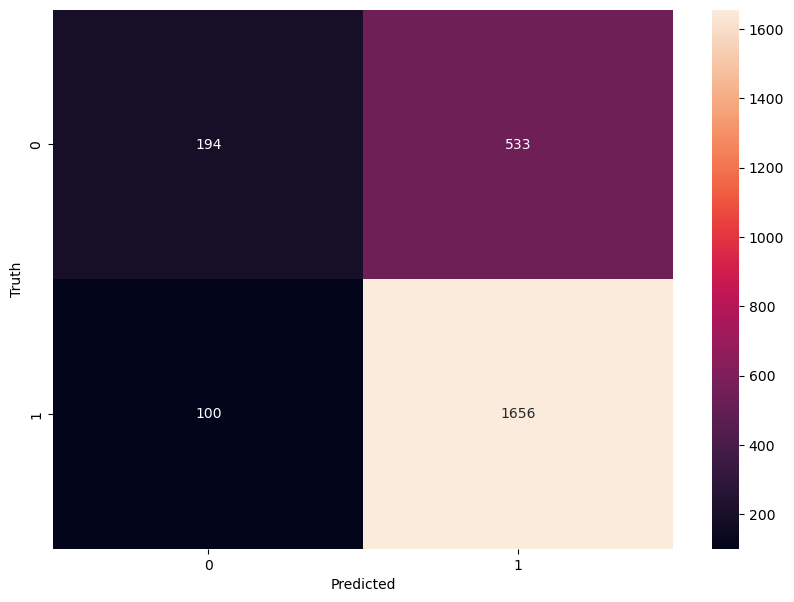

In [213]:
X = data.drop('RISK101', axis=1)
y = data['RISK101']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

# plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


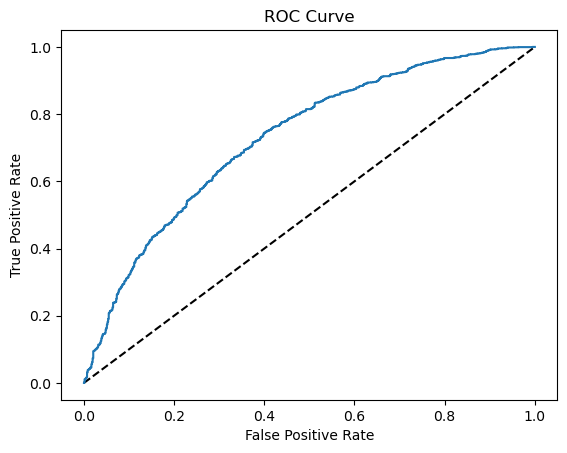

The AUC is:  0.7289560179600381


In [114]:
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
# Create true and false positive rates
y_hat = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_hat)

# Plot the ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print("The AUC is: ", roc_auc_score(y_test, y_hat))

Then lets use the raw data

In [187]:
rawdata = pd.read_csv('./data/ySKILLS/ySKILLS_longitudinal_dataset.csv', encoding="latin1", delimiter=";", low_memory=False)

In [188]:
rawdata.columns

Index(['country', 'waves', 'W1_anonID', 'W1_country', 'W1_startdate',
       'W1_Month_collection', 'W1_school', 'W1_class', 'W1_school_SES_PL',
       'W1_school_SES_PT',
       ...
       'W3_skill_comm_pro', 'W3_lit_comm_pro', 'W3_skill_cont_pro',
       'W3_lit_cont_pro', 'W3_kninf', 'W3_kncomm', 'W3_kncont',
       'W3_skill_know_pro', 'W3_skill_overall_pro', 'W3_lit_overall_pro'],
      dtype='object', length=862)

In [189]:

# Extract column names
column_names = rawdata.columns
assert len(column_names) == len(set(column_names)), "Column names are not unique"

# W#_<something> pattern
pattern = re.compile(r"W[1-3]_(.+)")
matching_columns = [col for col in column_names if pattern.match(col)]
non_matching_columns = [col for col in column_names if not pattern.match(col)]

# Step 2: Identify the unique base names and check their presence across W1, W2, W3
column_identifiers = {}
for col in matching_columns:
    wave = col[:2]  # W#
    identifier = pattern.findall(col)[0]  # <something>

    if identifier not in column_identifiers:
        column_identifiers[identifier] = set()
    column_identifiers[identifier].add(wave)

# Identify all that have all 3 waves
omni_wave_columns = [
    base for base, waves in column_identifiers.items() if len(waves) == 3
]
missing_wave_columns = [
    base for base, waves in column_identifiers.items() if len(waves) != 3
]

print(
    "The columns that do not match to W#_<something> pattern are:", non_matching_columns
)
print("The columns that do not exist in all 3 waves are:", missing_wave_columns)

# Drop hand-picked columns
unwanted_columns = [
    "country"
] # The country would end up being a dulicate column

filtered_columns = [col for col in omni_wave_columns if col not in unwanted_columns]

# Step 1: Load columns ["country"] + ["W1_" + x for x in all_waves]
df_1 = rawdata[["country"] + ["W1_" + col for col in filtered_columns]]
df_2 = rawdata[["country"] + ["W2_" + col for col in filtered_columns]]
df_3 = rawdata[["country"] + ["W3_" + col for col in filtered_columns]]

# Step 2: Rename the columns to not have the prefix
df_1.columns = ["country"] + filtered_columns
df_2.columns = ["country"] + filtered_columns
df_3.columns = ["country"] + filtered_columns

# Step 3: Concatenate the DataFrames
df_long = pd.concat([df_1, df_2, df_3], ignore_index=True)

The columns that do not match to W#_<something> pattern are: ['country', 'waves']
The columns that do not exist in all 3 waves are: ['ETHN_6_DE']


In [190]:
df_long

,country,anonID,startdate,Month_collection,school,class,school_SES_PL,school_SES_PT,school_SES_IT,school_SES_DE,...,skill_comm_pro,lit_comm_pro,skill_cont_pro,lit_cont_pro,kninf,kncomm,kncont,skill_know_pro,skill_overall_pro,lit_overall_pro
0,620,62002053277,25.05.2021 12:37,5,62002,62053,-94,2,-94,-94,...,0,",125",0,",25",2,1,2,",833333333333333",0,",161290322580645"
1,620,62007039181,17.06.2021 14:46,6,62007,62039,-94,3,-94,-94,...,1,",875",1,1,0,1,2,",5",1,",903225806451613"
2,620,62001045484,28.05.2021 7:53,5,62001,62045,-94,1,-94,-94,...,",166666666666667",",125",",333333333333333",",25",0,0,0,0,",44",",354838709677419"
3,620,-94,-94,-94,-94,-94,-94,-94,-94,-94,...,-94,-94,-94,,,,,-94,-94,-94
4,620,-94,-94,-94,-94,-94,-94,-94,-94,-94,...,-94,-94,-94,,,,,-94,-94,-94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32458,620,62006037746,09.02.2023 8:44,2,62006,62037,-94,3,-94,-94,...,1,",875",",2",",428571428571429",2,1,2,",833333333333333",",5",",566666666666667"
32459,620,62006037985,09.02.2023 8:35,2,62006,62037,-94,3,-94,-94,...,1,",875",",333333333333333",",5",1,1,2,",666666666666667",",72",",709677419354839"
32460,620,62006064018,09.02.2023 9:48,2,62006,62064,-94,3,-94,-94,...,",333333333333333",",5",",166666666666667",",375",2,2,2,1,",32",",451612903225806"
32461,620,62006064346,09.02.2023 9:48,2,62006,62064,-94,3,-94,-94,...,",5",",375",0,",125",1,0,1,",333333333333333",",24",",258064516129032"


In [191]:
mask = df_long["RISK101"] < 0
df_observations = df_long[~mask]

In [197]:
for column in df_observations.columns:
    # print the column name and the type of the column
    print(column, df_observations[column].dtype)

country int64
anonID int64
startdate float64
Month_collection int64
school int64
class int64
school_SES_PL int64
school_SES_PT int64
school_SES_IT int64
school_SES_DE int64
version int64
AGE1a int64
AGE1b int64
Age_year int64
GENDER int64
GENDER_other float64
GENDER_binary int64
NICK int64
NET1a float64
NET1b float64
NET1c int64
NET1d_FI int64
NET1e_FI float64
NET2a_rt int64
NET3a_rt int64
NET4a_rt int64
NET5a_rt int64
NET2b_rt int64
NET3b_rt int64
NET4b_rt int64
NET5b_rt int64
NET2c_rt int64
NET3c_rt int64
NET4c_rt int64
NET5c_rt int64
NET2d_rt_FI int64
NET3d_rt_FI int64
NET4d_rt_FI int64
NET5d_rt_FI int64
NET2e_rt_FI int64
NET3e_rt_FI int64
NET4e_rt_FI int64
NET5e_rt_FI int64
SES int64
COG int64
PHY1 int64
PHY2 int64
INT1 int64
INT2a int64
INT2b int64
INT2c int64
INT3 int64
INT4 int64
SKILL1a int64
SKILL1b int64
SKILL1c int64
SKILL1d int64
SKILL1e int64
SKILL1f int64
SKILL1g int64
SKILL2a int64
SKILL2b int64
SKILL2c int64
SKILL2d int64
SKILL2e int64
SKILL2f int64
SKILL3a int64
SKILL3

In [186]:
numeric_cols = df_observations.select_dtypes(include=[np.number])

# Convert negative values to NaN
df_observations[numeric_cols.columns] = numeric_cols.applymap(lambda x: np.nan if x < 0 else x)

df_observations.replace('', np.nan, inplace=True)

# Check if the negative values have been converted
df_observations.head()

/var/folders/4d/36mhsq510hsgz5kb3bc056vc0000gn/T/ipykernel_12537/2513396322.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_observations[numeric_cols.columns] = numeric_cols.applymap(lambda x: np.nan if x < 0 else x)


,country,anonID,Month_collection,school,class,school_SES_PL,school_SES_PT,school_SES_IT,school_SES_DE,version,...,skill_comm_pro,lit_comm_pro,skill_cont_pro,lit_cont_pro,kninf,kncomm,kncont,skill_know_pro,skill_overall_pro,lit_overall_pro
25,620,62001025629,5.0,62001.0,62025.0,NaN,1.0,NaN,NaN,1,...,1.0,0.875,0.666667,0.75,1,1,2,0.666667,0.56,0.580645
27,620,62004005026,5.0,62004.0,62005.0,NaN,2.0,NaN,NaN,1,...,0.666667,0.75,0.0,0.125,2,2,1,0.833333,0.28,0.387097
28,620,62006037360,5.0,62006.0,62037.0,NaN,3.0,NaN,NaN,1,...,0.666667,0.5,0.666667,0.625,1,0,1,0.333333,0.8,0.709677
30,620,62003054890,6.0,62003.0,62054.0,NaN,3.0,NaN,NaN,1,...,0.666667,0.5,0.0,0.125,2,0,1,0.5,0.44,0.451613
41,620,62001025539,5.0,62001.0,62025.0,NaN,1.0,NaN,NaN,1,...,0.833333,0.75,0.666667,0.75,1,1,2,0.666667,0.68,0.677419


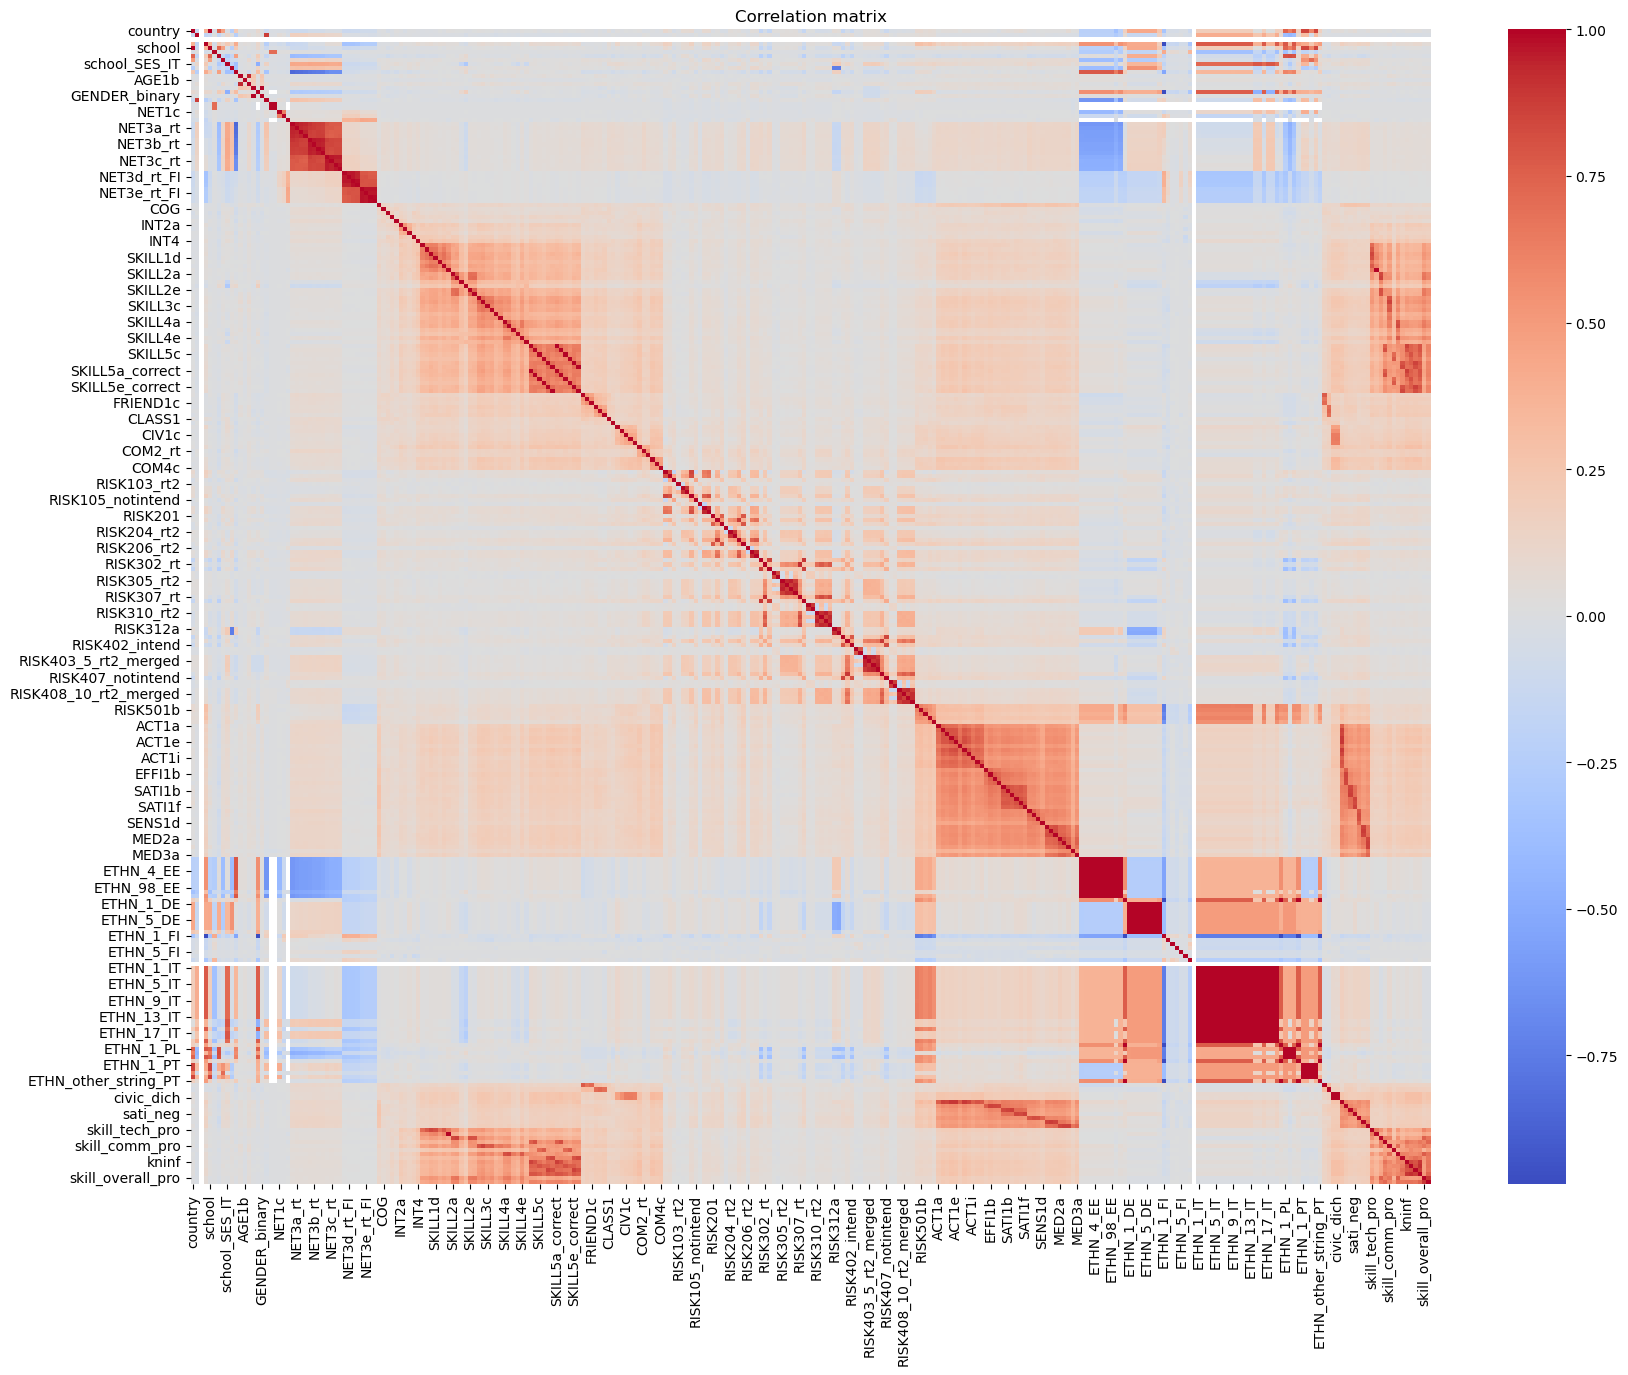

In [200]:
# correlation matrix
correlation_matrix = df_observations.corr()

# plot the correlation matrix
plt.figure(figsize=(20, 15))

sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f")
plt.title("Correlation matrix")
plt.show()

In [121]:
basic_info_columns = [
    "country",
    "Age_year",
    "GENDER",
]

derivated_columns = [
    "friends",
    "family",
    "civic",
    # "civic_dich",        # Skipped due to reasons explained in the cell above
    "daily_activities",
    "effi",
    "sati_pos",
    "sati_neg",
    "sensa",
    "restrict",
    "enabling",
    "skill_tech_pro",
    "skill_progr",
    # "skill_inf_pro",     # ... same
    "lit_inf_pro",
    # "skill_comm_pro",    # ... same
    "lit_comm_pro",
    # "skill_cont_pro",    # ... same
    "lit_cont_pro",
    "kninf",
    "kncomm",
    "kncont",
    "skill_know_pro",
    # "skill_overall_pro", # ... same
    "lit_overall_pro",
]

target_column = ["RISK101"]

df_cherry_picked = df_observations[basic_info_columns + derivated_columns + target_column]

In [122]:
df_cherry_picked['daily_activities']

25       6
27       3
28       7
30       2
41       9
        ..
32454    6
32458    5
32459    7
32460    5
32461    4
Name: daily_activities, Length: 12413, dtype: int64

In [123]:
# Create a DataFrame that shows all the unique values per column. Row should be a column, and the values should be a set of unique values in that column.
unique_values = df_cherry_picked.map(lambda x: round(x, 2)).apply(lambda x: set(x.unique()), axis=0)

# Display it as a DataFrame
unique_values_df = pd.DataFrame(unique_values, columns=["unique_values"])

# Round all values to precision of 2
unique_values_df = unique_values_df

# Add a column that displays the count of unique values in the column unique_values
unique_values_df["n_unique"] = unique_values_df["unique_values"].apply(len)
unique_values_df["n_uniq_non_neg"] = unique_values_df["unique_values"].apply(lambda x: len([v for v in x if v >= 0]))
unique_values_df["min"] = df_cherry_picked.min()
unique_values_df["min_non_neg"] = df_cherry_picked[df_cherry_picked >= 0].min()
unique_values_df["max"] = df_cherry_picked.max()
unique_values_df["percent_missing"] = (df_cherry_picked[df_cherry_picked < 0].count() / df_cherry_picked.count() * 100).round(2)

unique_values_df


,unique_values,n_unique,n_uniq_non_neg,min,min_non_neg,max,percent_missing
country,"{616, 233, 620, 276, 246, 380}",6,6,233,233,620,0.00
Age_year,"{10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 2...",14,13,-99,10.0,22,0.12
GENDER,"{0, 1, 2, -99}",4,3,-99,0.0,2,0.01
friends,"{1.67, 2.67, 3.67, 3.0, 3.33, 4.0, 2.33, 2.0, ...",11,10,-99.0,1.0,4.0,11.29
family,"{1.67, 2.67, 3.0, 3.67, 4.0, 2.33, 3.33, 1.33,...",11,10,-99.0,1.0,4.0,8.75
civic,"{1.4, 2.4, 1.6, 4.0, 1.25, 3.4, 3.25, 2.6, 2.2...",32,31,-99.0,1.0,4.0,4.42
daily_activities,"{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, -99}",13,12,-99,0.0,11,4.58
effi,"{1.67, 2.0, 2.5, 3.5, 3.25, 3.0, 4.0, 2.33, 3....",20,19,-99.0,1.0,4.0,7.65
sati_pos,"{1.67, 2.67, 3.33, 4.0, 1.0, 3.67, 2.0, 2.33, ...",11,10,-99.0,1.0,4.0,9.03
sati_neg,"{1.67, 2.67, 3.33, 1.33, 3.0, 4.0, 2.33, 2.0, ...",11,10,-99.0,1.0,4.0,9.93


# Convert negative values to NAN

In [124]:
df_cherry_picked = df_cherry_picked.map(lambda x: np.nan if x < 0 else x)


In [125]:
df_cherry_picked

,country,Age_year,GENDER,friends,family,civic,daily_activities,effi,sati_pos,sati_neg,...,skill_progr,lit_inf_pro,lit_comm_pro,lit_cont_pro,kninf,kncomm,kncont,skill_know_pro,lit_overall_pro,RISK101
25,620,18.0,0.0,4.000000,3.666667,1.40,6.0,2.500000,3.333333,1.666667,...,0.0,0.125,0.875,0.750000,1.0,1.0,2.0,0.666667,0.580645,1
27,620,16.0,1.0,NaN,3.000000,1.25,3.0,1.666667,3.333333,NaN,...,0.0,0.250,0.750,0.125000,2.0,2.0,1.0,0.833333,0.387097,1
28,620,16.0,0.0,3.333333,4.000000,1.60,7.0,3.500000,4.000000,1.333333,...,0.0,0.875,0.500,0.625000,1.0,0.0,1.0,0.333333,0.709677,0
30,620,16.0,0.0,3.333333,3.666667,1.60,2.0,2.000000,4.000000,2.666667,...,0.0,0.375,0.500,0.125000,2.0,0.0,1.0,0.500000,0.451613,1
41,620,16.0,1.0,3.666667,3.666667,4.00,9.0,3.250000,2.666667,3.333333,...,0.0,0.750,0.750,0.750000,1.0,1.0,2.0,0.666667,0.677419,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32454,620,18.0,1.0,3.000000,2.666667,1.00,6.0,2.500000,4.000000,3.000000,...,0.0,0.500,0.750,0.250000,0.0,2.0,1.0,0.500000,0.548387,1
32458,620,18.0,0.0,4.000000,4.000000,2.00,5.0,3.750000,3.666667,3.333333,...,0.0,0.750,0.875,0.428571,2.0,1.0,2.0,0.833333,0.566667,1
32459,620,18.0,0.0,3.000000,3.000000,2.20,7.0,4.000000,4.000000,2.333333,...,0.0,0.625,0.875,0.500000,1.0,1.0,2.0,0.666667,0.709677,1
32460,620,18.0,1.0,3.333333,3.666667,3.40,5.0,3.250000,4.000000,2.666667,...,0.0,0.250,0.500,0.375000,2.0,2.0,2.0,1.000000,0.451613,1


In [126]:
unique_values = df_cherry_picked.map(lambda x: round(x, 2)).apply(lambda x: set(x.unique()), axis=0)

# Display it as a DataFrame
unique_values_df = pd.DataFrame(unique_values, columns=["unique_values"])

# Round all values to precision of 2
unique_values_df = unique_values_df

# Add a column that displays the count of unique values in the column unique_values
unique_values_df["n_unique"] = unique_values_df["unique_values"].apply(len)
unique_values_df["n_uniq_non_neg"] = unique_values_df["unique_values"].apply(lambda x: len([v for v in x if v >= 0]))
unique_values_df["min"] = df_cherry_picked.min()
unique_values_df["min_non_neg"] = df_cherry_picked[df_cherry_picked >= 0].min()
unique_values_df["max"] = df_cherry_picked.max()
# count the nan values
unique_values_df["percent_missing"] = (df_cherry_picked.isna().sum() / df_cherry_picked.count() * 100).round(2)
unique_values_df


,unique_values,n_unique,n_uniq_non_neg,min,min_non_neg,max,percent_missing
country,"{616, 233, 620, 276, 246, 380}",6,6,233.0,233.0,620.0,0.00
Age_year,"{nan, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0...",14,13,10.0,10.0,22.0,0.12
GENDER,"{0.0, 1.0, 2.0, nan}",4,3,0.0,0.0,2.0,0.01
friends,"{nan, 1.67, 2.67, 3.0, 3.33, 4.0, 3.67, 2.33, ...",11,10,1.0,1.0,4.0,12.72
family,"{nan, 1.67, 2.67, 3.0, 3.67, 4.0, 2.33, 3.33, ...",11,10,1.0,1.0,4.0,9.59
civic,"{nan, 1.4, 2.4, 1.6, 4.0, 1.25, 3.4, 3.25, 2.6...",32,31,1.0,1.0,4.0,4.63
daily_activities,"{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, nan, ...",13,12,0.0,0.0,11.0,4.80
effi,"{nan, 1.67, 2.0, 2.5, 3.5, 3.25, 3.0, 4.0, 2.3...",20,19,1.0,1.0,4.0,8.28
sati_pos,"{nan, 1.67, 2.67, 3.33, 4.0, 1.0, 3.67, 2.0, 2...",11,10,1.0,1.0,4.0,9.93
sati_neg,"{nan, 1.67, 2.67, 3.33, 1.33, 3.0, 4.0, 2.33, ...",11,10,1.0,1.0,4.0,11.03


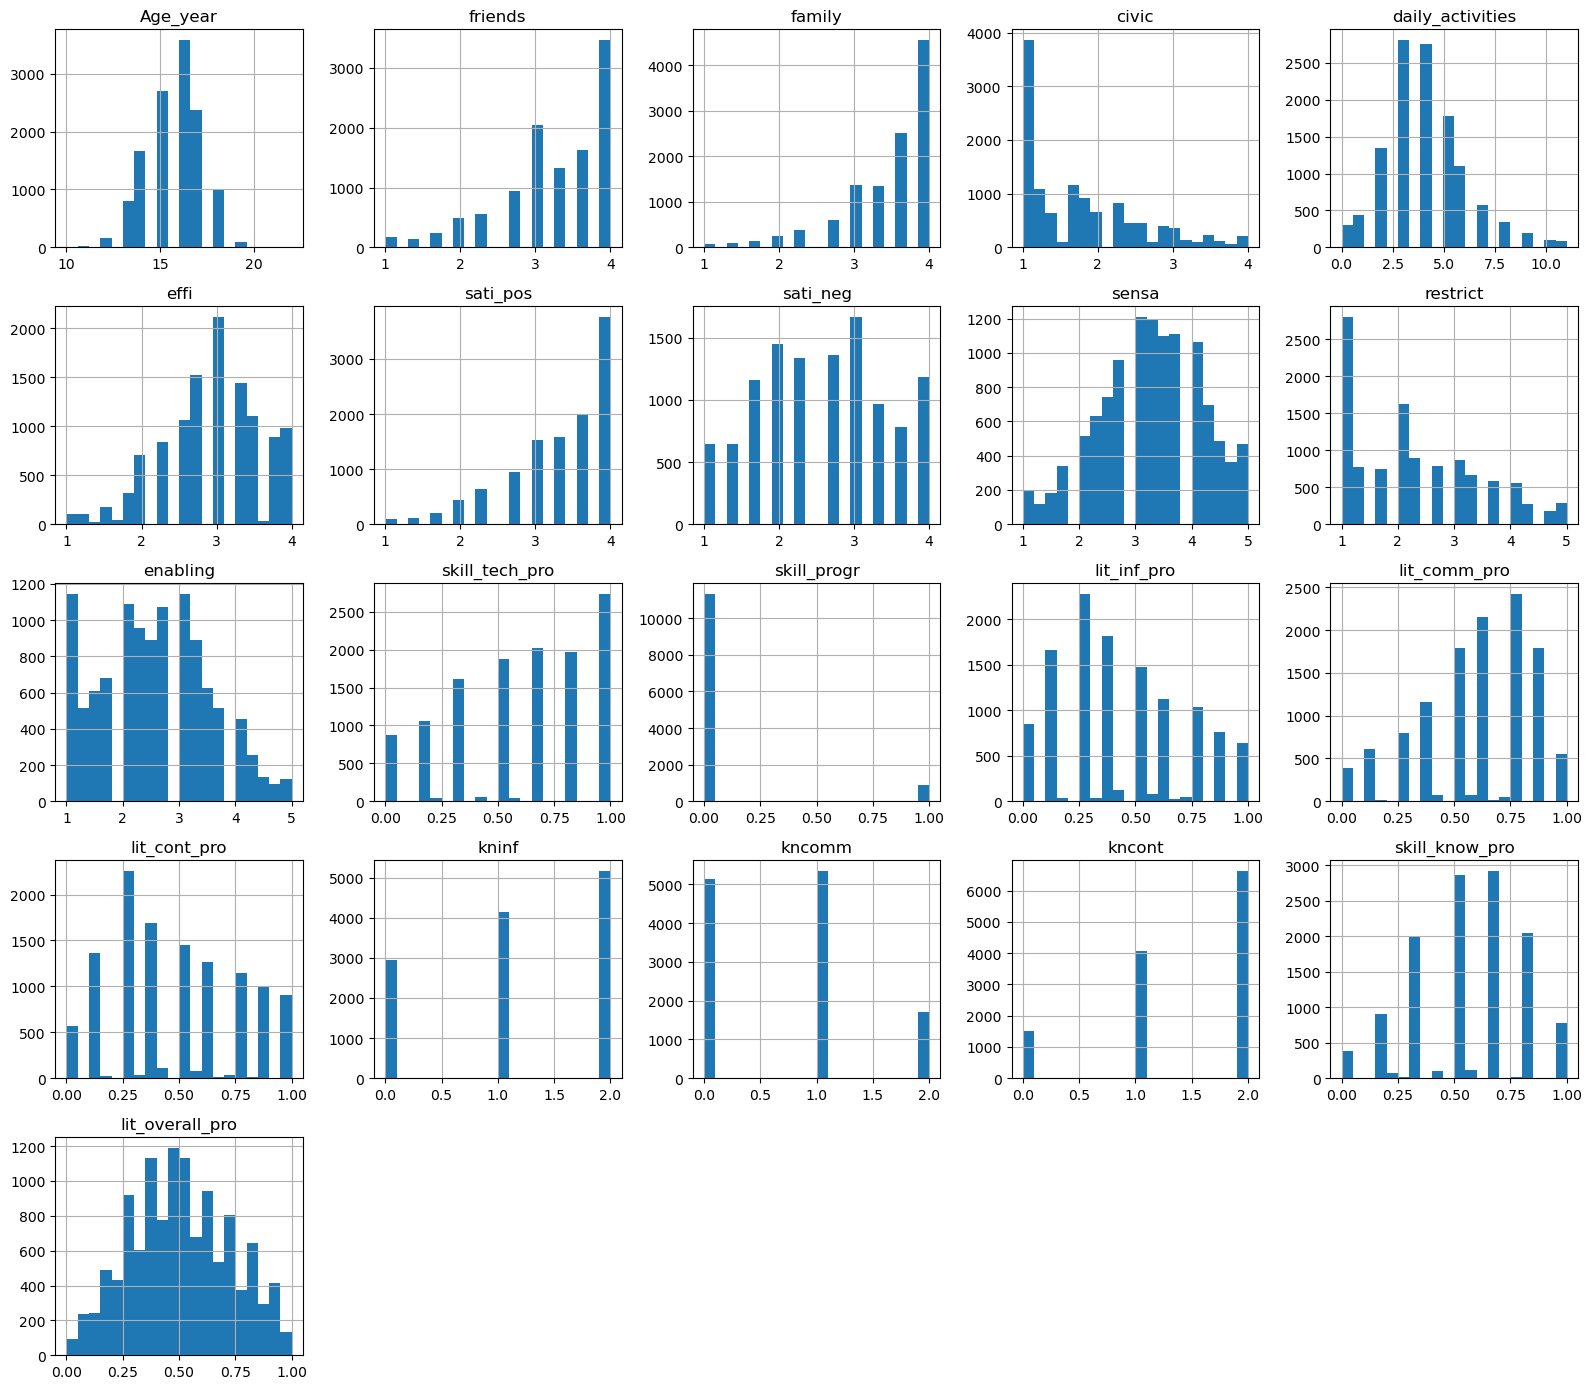

In [127]:
df_cherry_picked[['Age_year', 'friends', 'family', 'civic', 'daily_activities', 'effi', 
    'sati_pos', 'sati_neg', 'sensa', 'restrict', 'enabling', 
    'skill_tech_pro', 'skill_progr', 'lit_inf_pro', 'lit_comm_pro', 
    'lit_cont_pro', 'kninf', 'kncomm', 'kncont', 'skill_know_pro', 
    'lit_overall_pro']].hist(figsize=(16, 14), bins=20)
plt.tight_layout()
plt.show()

In [129]:
columns_with_missing_values = unique_values_df[unique_values_df["percent_missing"] > 0].index

columns_with_missing_values

Index(['Age_year', 'GENDER', 'friends', 'family', 'civic', 'daily_activities',
       'effi', 'sati_pos', 'sati_neg', 'sensa', 'restrict', 'enabling',
       'skill_tech_pro', 'skill_progr', 'lit_inf_pro', 'lit_comm_pro',
       'lit_cont_pro', 'kninf', 'kncomm', 'kncont', 'skill_know_pro',
       'lit_overall_pro'],
      dtype='object')

In [130]:
categorical_columns = ['GENDER', 'country', 'skill_progr', 'kninf', 'kncomm', 'kncont']

for col in columns_with_missing_values:
    if col in categorical_columns:
        df_cherry_picked[col] = df_cherry_picked[col].fillna(df_cherry_picked[col].mode()[0])
    else:
        df_cherry_picked[col] = df_cherry_picked[col].fillna(df_cherry_picked[col].mean())

df_cherry_picked


,country,Age_year,GENDER,friends,family,civic,daily_activities,effi,sati_pos,sati_neg,...,skill_progr,lit_inf_pro,lit_comm_pro,lit_cont_pro,kninf,kncomm,kncont,skill_know_pro,lit_overall_pro,RISK101
25,620,18.0,0.0,4.000000,3.666667,1.40,6.0,2.500000,3.333333,1.666667,...,0.0,0.125,0.875,0.750000,1.0,1.0,2.0,0.666667,0.580645,1
27,620,16.0,1.0,3.265377,3.000000,1.25,3.0,1.666667,3.333333,2.582528,...,0.0,0.250,0.750,0.125000,2.0,2.0,1.0,0.833333,0.387097,1
28,620,16.0,0.0,3.333333,4.000000,1.60,7.0,3.500000,4.000000,1.333333,...,0.0,0.875,0.500,0.625000,1.0,0.0,1.0,0.333333,0.709677,0
30,620,16.0,0.0,3.333333,3.666667,1.60,2.0,2.000000,4.000000,2.666667,...,0.0,0.375,0.500,0.125000,2.0,0.0,1.0,0.500000,0.451613,1
41,620,16.0,1.0,3.666667,3.666667,4.00,9.0,3.250000,2.666667,3.333333,...,0.0,0.750,0.750,0.750000,1.0,1.0,2.0,0.666667,0.677419,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32454,620,18.0,1.0,3.000000,2.666667,1.00,6.0,2.500000,4.000000,3.000000,...,0.0,0.500,0.750,0.250000,0.0,2.0,1.0,0.500000,0.548387,1
32458,620,18.0,0.0,4.000000,4.000000,2.00,5.0,3.750000,3.666667,3.333333,...,0.0,0.750,0.875,0.428571,2.0,1.0,2.0,0.833333,0.566667,1
32459,620,18.0,0.0,3.000000,3.000000,2.20,7.0,4.000000,4.000000,2.333333,...,0.0,0.625,0.875,0.500000,1.0,1.0,2.0,0.666667,0.709677,1
32460,620,18.0,1.0,3.333333,3.666667,3.40,5.0,3.250000,4.000000,2.666667,...,0.0,0.250,0.500,0.375000,2.0,2.0,2.0,1.000000,0.451613,1


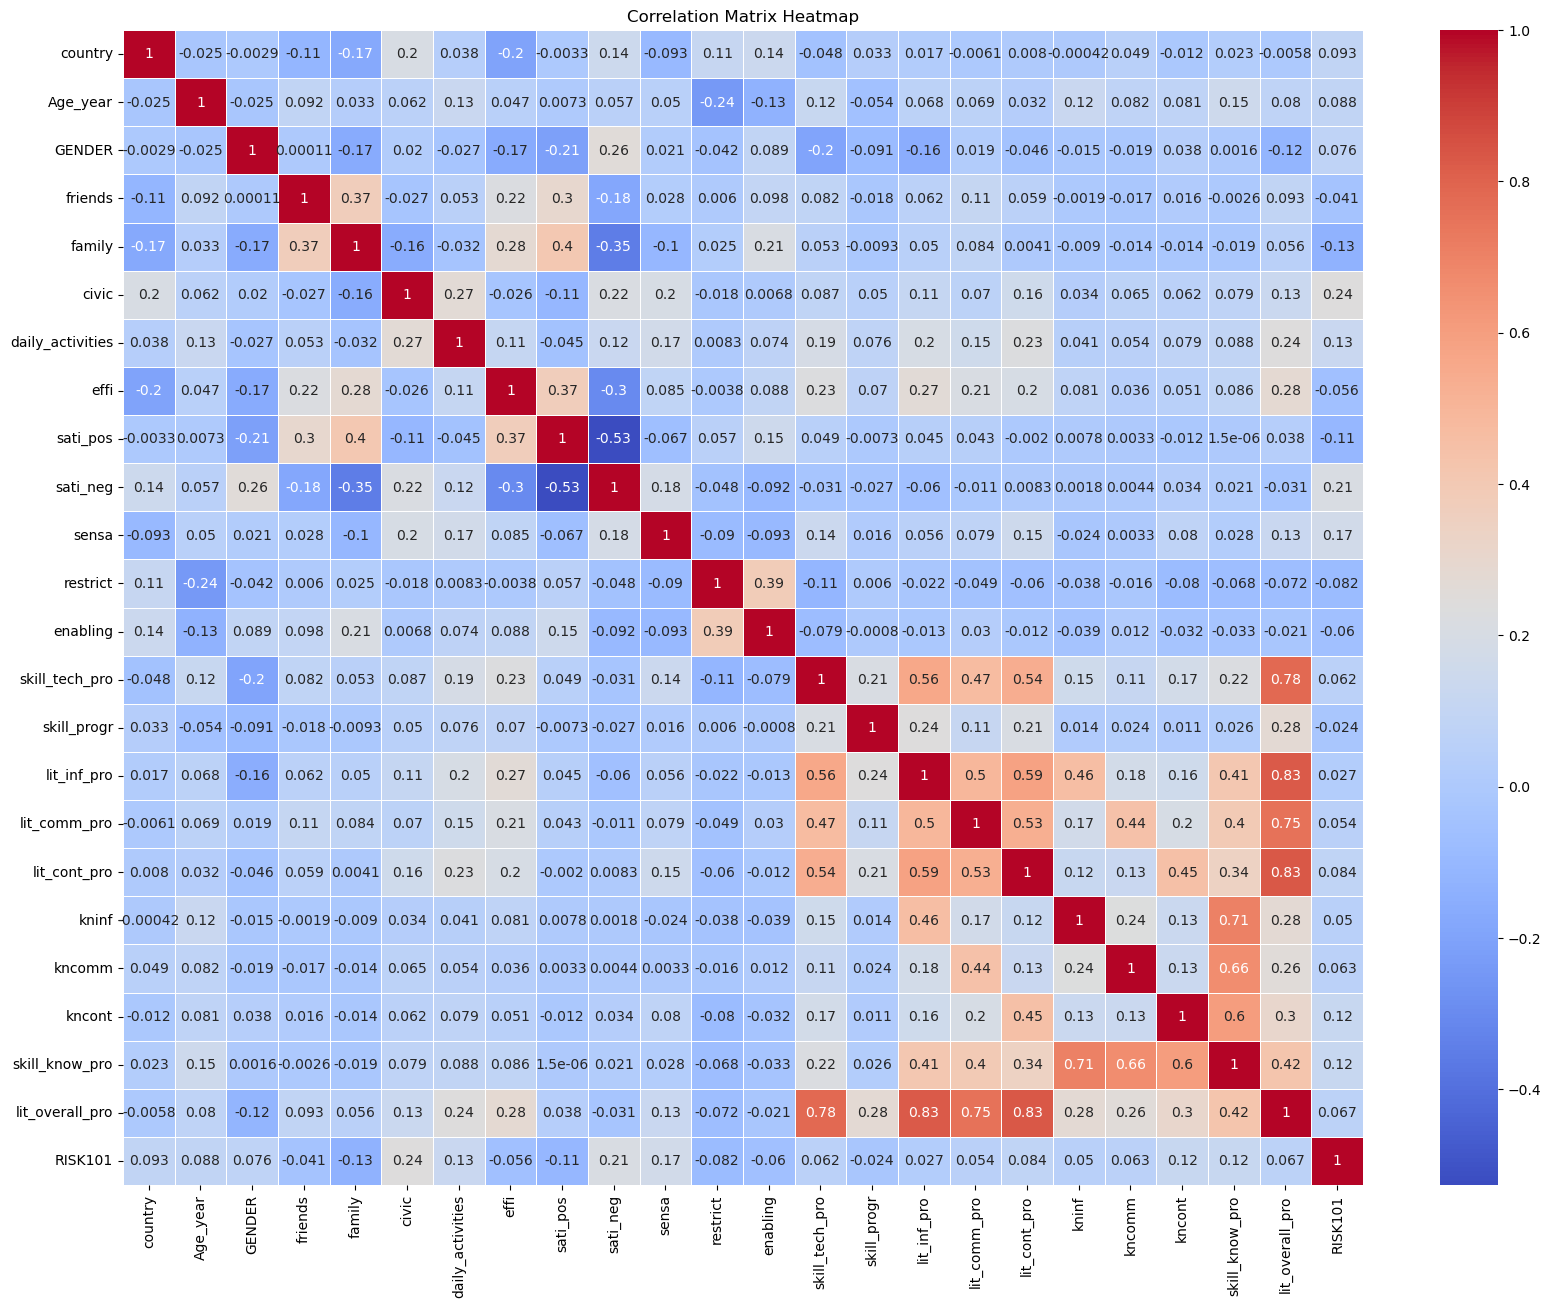

In [131]:
corr_matrix = df_cherry_picked.corr()

# Plot heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

Notes 

- lit_inf_pro and lit_comm_pro: These two variables have a correlation of 0.83, which is quite high. A correlation above 0.8 is generally considered strong, meaning these two variables might be providing redundant information to the model.


In [94]:
df_cherry_picked['combined_skills_knowledge'] = df_cherry_picked[['skill_tech_pro', 'lit_inf_pro', 'lit_comm_pro', 'lit_cont_pro', 'skill_know_pro', 'lit_overall_pro']].mean(axis=1)

# drop the columns that were used to create the combined column

df_cherry_picked = df_cherry_picked.drop(['skill_tech_pro', 'lit_inf_pro', 'lit_comm_pro', 'lit_cont_pro', 'skill_know_pro', 'lit_overall_pro'], axis=1)


In [97]:
df_cherry_picked.drop(['skill_progr'], axis=1, inplace=True)

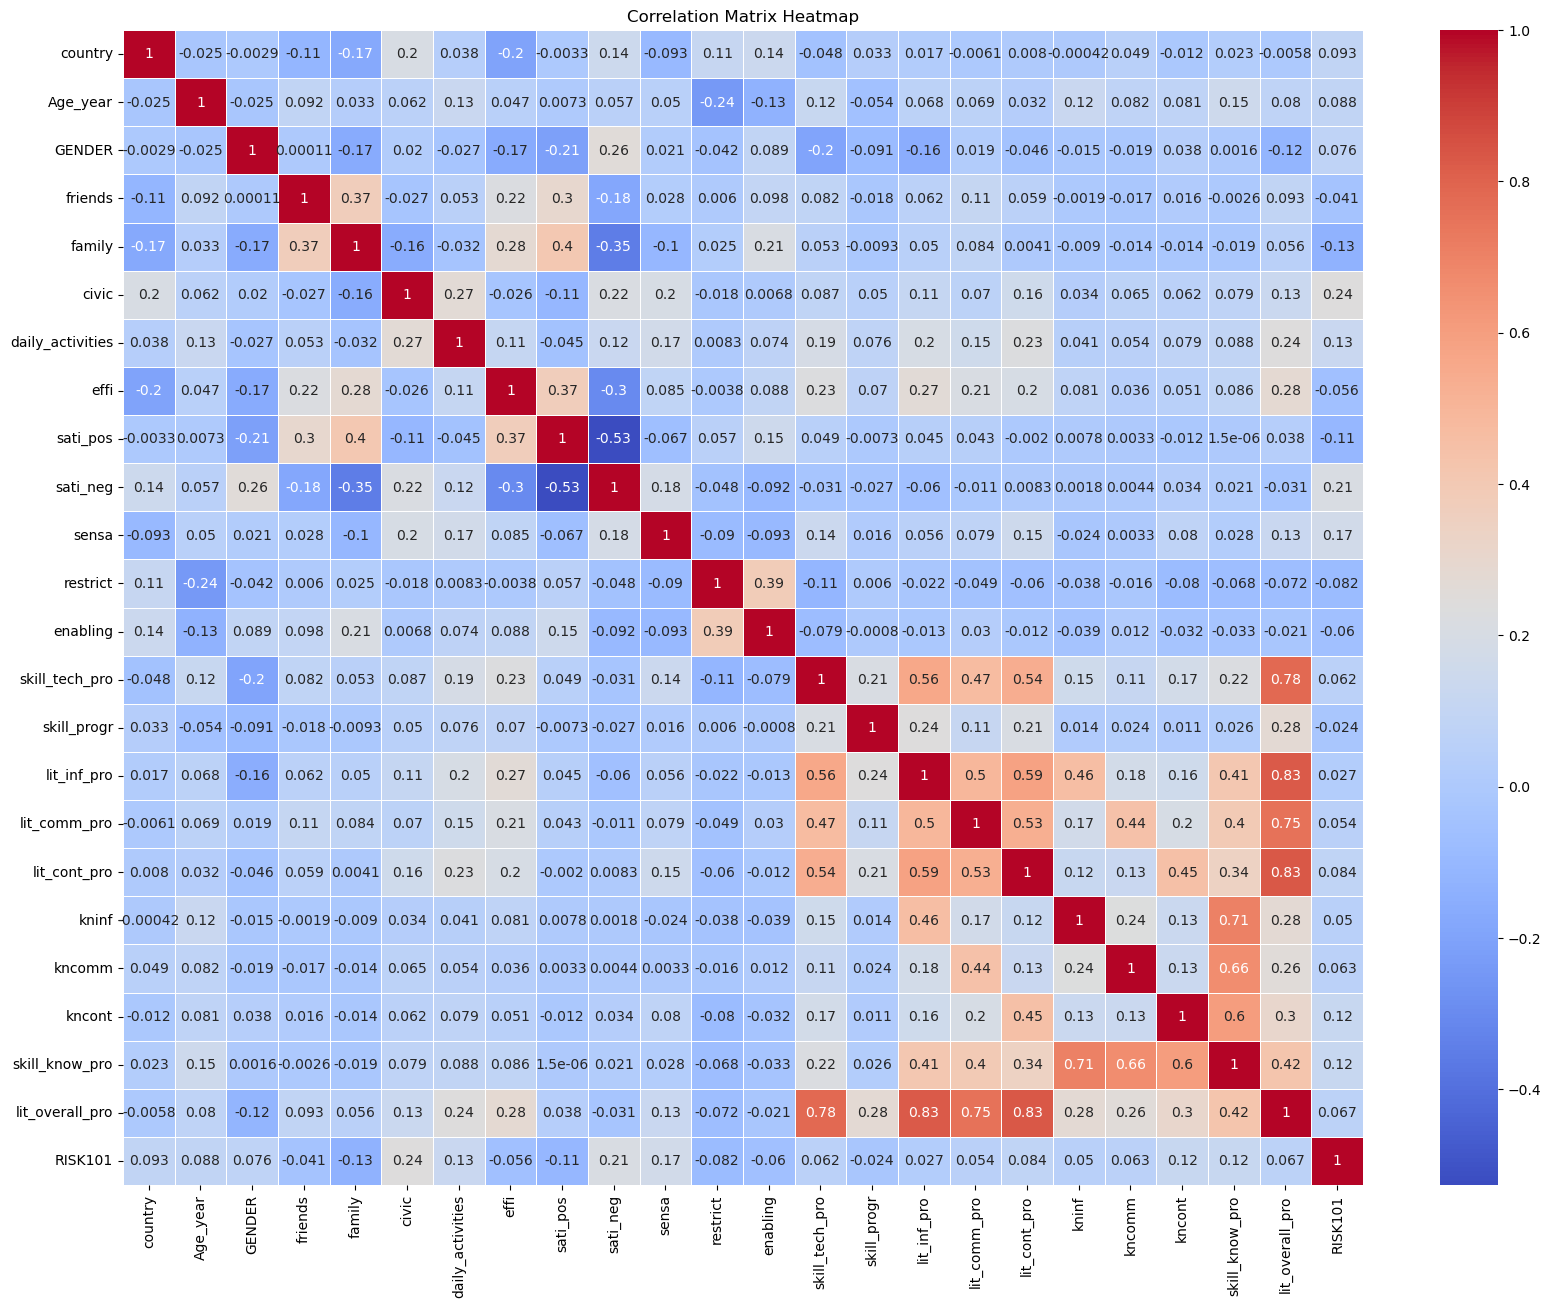

In [132]:
corr_matrix = df_cherry_picked.corr()

# Plot heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [134]:
df_cherry_picked

,country,Age_year,GENDER,friends,family,civic,daily_activities,effi,sati_pos,sati_neg,...,skill_progr,lit_inf_pro,lit_comm_pro,lit_cont_pro,kninf,kncomm,kncont,skill_know_pro,lit_overall_pro,RISK101
25,620,18.0,0.0,4.000000,3.666667,1.40,6.0,2.500000,3.333333,1.666667,...,0.0,0.125,0.875,0.750000,1.0,1.0,2.0,0.666667,0.580645,1
27,620,16.0,1.0,3.265377,3.000000,1.25,3.0,1.666667,3.333333,2.582528,...,0.0,0.250,0.750,0.125000,2.0,2.0,1.0,0.833333,0.387097,1
28,620,16.0,0.0,3.333333,4.000000,1.60,7.0,3.500000,4.000000,1.333333,...,0.0,0.875,0.500,0.625000,1.0,0.0,1.0,0.333333,0.709677,0
30,620,16.0,0.0,3.333333,3.666667,1.60,2.0,2.000000,4.000000,2.666667,...,0.0,0.375,0.500,0.125000,2.0,0.0,1.0,0.500000,0.451613,1
41,620,16.0,1.0,3.666667,3.666667,4.00,9.0,3.250000,2.666667,3.333333,...,0.0,0.750,0.750,0.750000,1.0,1.0,2.0,0.666667,0.677419,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32454,620,18.0,1.0,3.000000,2.666667,1.00,6.0,2.500000,4.000000,3.000000,...,0.0,0.500,0.750,0.250000,0.0,2.0,1.0,0.500000,0.548387,1
32458,620,18.0,0.0,4.000000,4.000000,2.00,5.0,3.750000,3.666667,3.333333,...,0.0,0.750,0.875,0.428571,2.0,1.0,2.0,0.833333,0.566667,1
32459,620,18.0,0.0,3.000000,3.000000,2.20,7.0,4.000000,4.000000,2.333333,...,0.0,0.625,0.875,0.500000,1.0,1.0,2.0,0.666667,0.709677,1
32460,620,18.0,1.0,3.333333,3.666667,3.40,5.0,3.250000,4.000000,2.666667,...,0.0,0.250,0.500,0.375000,2.0,2.0,2.0,1.000000,0.451613,1


In [201]:
target = 'RISK101'
X = df_cherry_picked.drop(columns=[target])
y = df_cherry_picked[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Accuracy: 74.25%
Confusion Matrix:
 [[ 232  822]
 [ 137 2533]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.22      0.33      1054
           1       0.75      0.95      0.84      2670

    accuracy                           0.74      3724
   macro avg       0.69      0.58      0.58      3724
weighted avg       0.72      0.74      0.70      3724



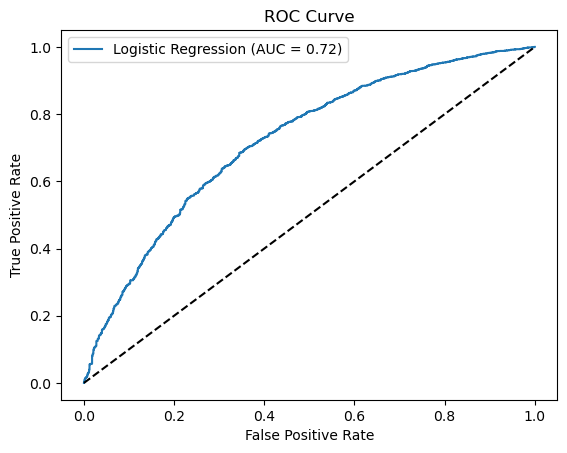

In [202]:
log_model = LogisticRegression(max_iter=100000)
log_model.fit(X_train_scaled, y_train)

y_pred = log_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

y_pred_proba = log_model.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

SGDClassifier Accuracy: 72.85%
Confusion Matrix:
 [[ 147  907]
 [ 104 2566]]
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.14      0.23      1054
           1       0.74      0.96      0.84      2670

    accuracy                           0.73      3724
   macro avg       0.66      0.55      0.53      3724
weighted avg       0.70      0.73      0.66      3724



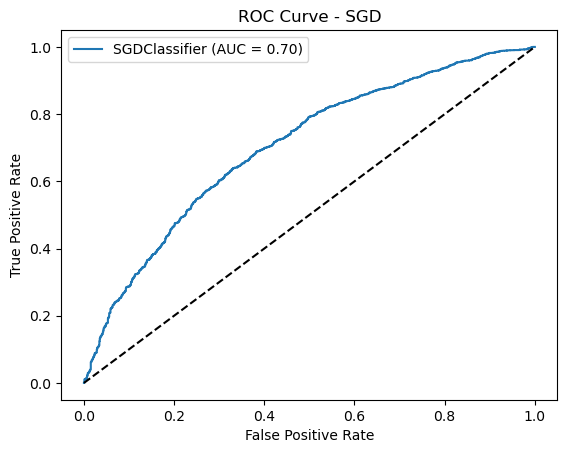

In [203]:
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier(loss='log_loss', max_iter=1000)
sgd_model.fit(X_train_scaled, y_train)

y_pred_sgd = sgd_model.predict(X_test_scaled)

accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
conf_matrix_sgd = confusion_matrix(y_test, y_pred_sgd)
class_report_sgd = classification_report(y_test, y_pred_sgd)

print(f"SGDClassifier Accuracy: {accuracy_sgd * 100:.2f}%")
print("Confusion Matrix:\n", conf_matrix_sgd)
print("Classification Report:\n", class_report_sgd)

y_pred_proba_sgd = sgd_model.decision_function(X_test_scaled)
roc_auc_sgd = roc_auc_score(y_test, y_pred_proba_sgd)

fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(y_test, y_pred_proba_sgd)
plt.figure()
plt.plot(fpr_sgd, tpr_sgd, label=f'SGDClassifier (AUC = {roc_auc_sgd:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SGD')
plt.legend()
plt.show()
